In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [4]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [5]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 14618.8008
Epoch 2/200
47/47 - 0s - loss: 9747.4541
Epoch 3/200
47/47 - 0s - loss: 5818.5698
Epoch 4/200
47/47 - 0s - loss: 3174.0146
Epoch 5/200
47/47 - 0s - loss: 1602.3635
Epoch 6/200
47/47 - 0s - loss: 902.0709
Epoch 7/200
47/47 - 0s - loss: 645.5496
Epoch 8/200
47/47 - 0s - loss: 570.7242
Epoch 9/200
47/47 - 0s - loss: 545.4631
Epoch 10/200
47/47 - 0s - loss: 544.1171
Epoch 11/200
47/47 - 0s - loss: 538.2032
Epoch 12/200
47/47 - 0s - loss: 541.0261
Epoch 13/200
47/47 - 0s - loss: 541.3391
Epoch 14/200
47/47 - 0s - loss: 537.9558
Epoch 15/200
47/47 - 0s - loss: 536.9807
Epoch 16/200
47/47 - 0s - loss: 540.4547
Epoch 17/200
47/47 - 0s - loss: 538.0861
Epoch 18/200
47/47 - 0s - loss: 538.6266
Epoch 19/200
47/47 - 0s - loss: 538.2466
Epoch 20/200
47/47 - 0s - loss: 541.0751
Epoch 21/200
47/47 - 0s - loss: 536.9308
Epoch 22/200
47/47 - 0s - loss: 542.6609
Epoch 23/200
47/47 - 0s - loss: 538.6790
Epoch 24/200
47/47 - 0s - loss: 542.5930
Epoch 25/200
47/47 

Epoch 199/200
47/47 - 0s - loss: 541.9570
Epoch 200/200
47/47 - 0s - loss: 543.7620


In [6]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 530.44 MSE (23.03 RMSE)
Test Score: 2350.94 MSE (48.49 RMSE)


In [7]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

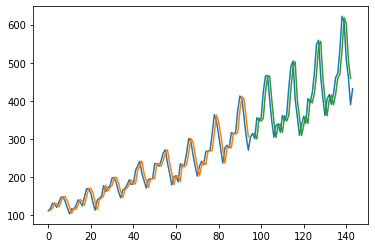

In [8]:
# plot baseline and predictions
#showing the original dataset in blue, 
#the predictions for the traindataset in orange 
#the predictions on the unseen test dataset in green.
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
